# Laboratorio 4 - Marco Antonio Rimola De Leon
IDE09111187 - 25 Junio 2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics

In [2]:
df = pd.read_csv('BankData.csv')

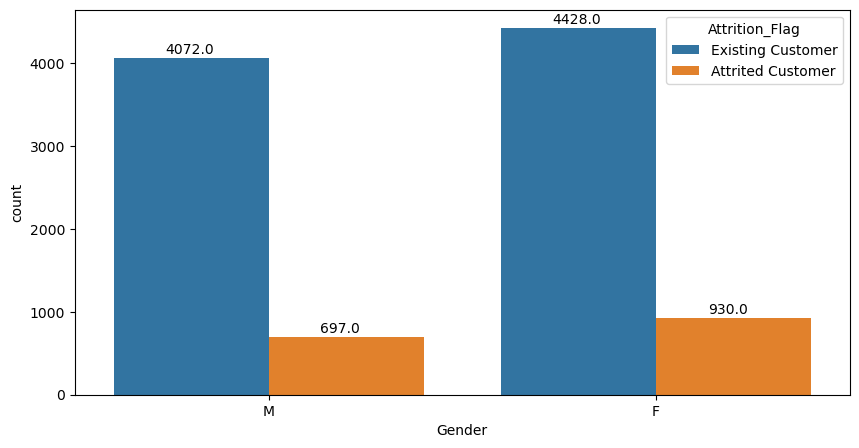

In [3]:
plt.figure(figsize=(10,5))
plot = sns.countplot(x=df['Gender'], hue=df['Attrition_Flag'])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x() + p.get_width()/3, p.get_height() +50)) #add data values and center them

In [4]:
def plotColumn_vrs_target(df, colname, target):
    plt.figure(figsize=(10,5))
    plot = sns.countplot(x=df[colname], hue=df[target])
    plt.title(colname)
    
    for p in plot.patches:
        plot.annotate(p.get_height(), (p.get_x() + p.get_width()/3, p.get_height() +50)) #add data values and center them
    plt.show()


In [5]:
categorical = []
discrete = []
continuous = []

explicatory_vars = list(df.columns)
explicatory_vars.remove('CLIENTNUM')
explicatory_vars.remove('Attrition_Flag')

In [6]:
for colName in explicatory_vars:
    if df[colName].dtype == 'object':
        categorical.append(colName)
    elif df[colName].dtype in ['int64', 'float64'] and len(df[colName].unique()) <= 30:
        discrete.append(colName)
    else:
        continuous.append(colName)    

categorical_and_discrete = categorical + discrete

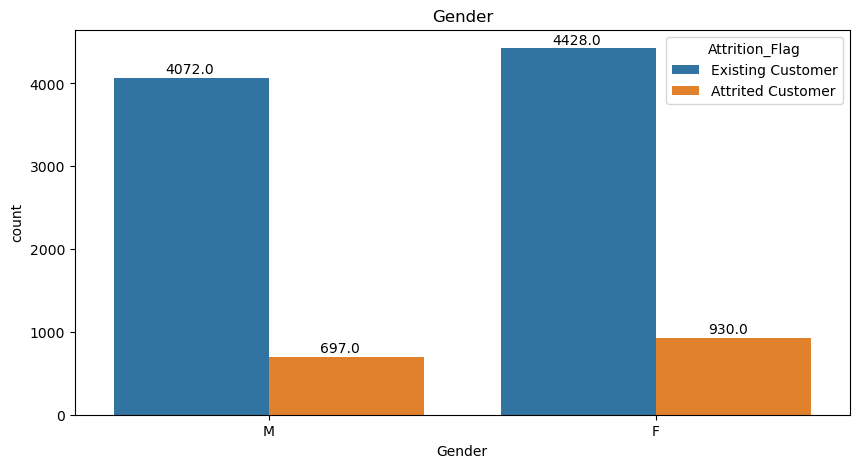

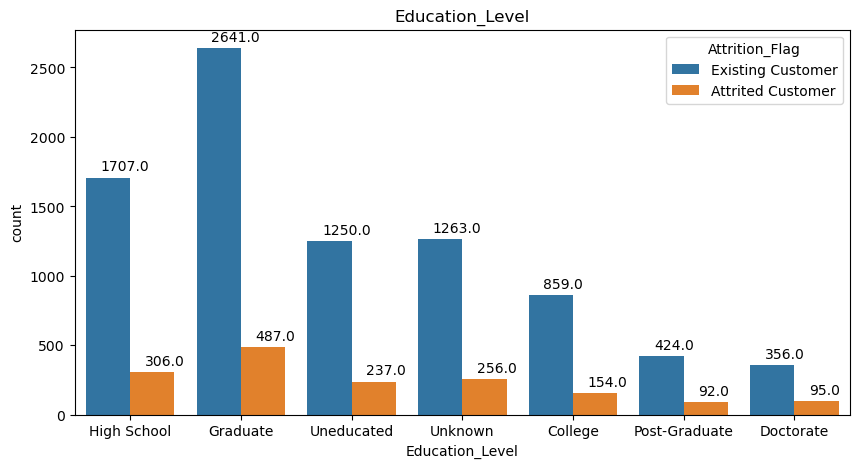

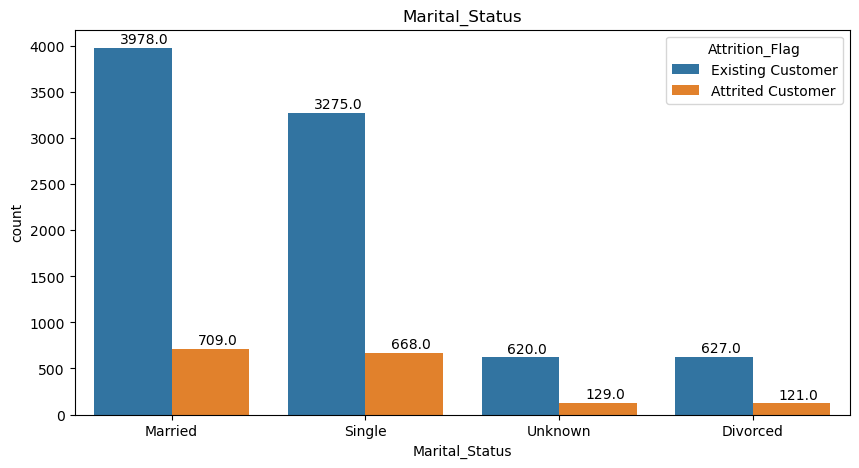

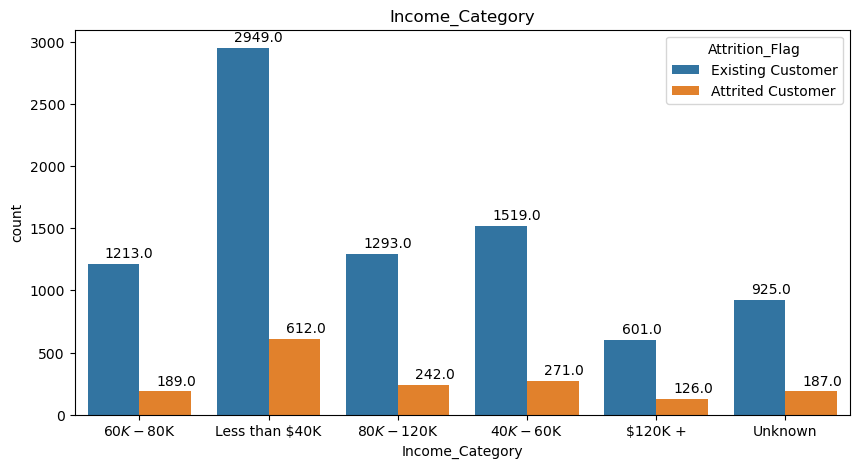

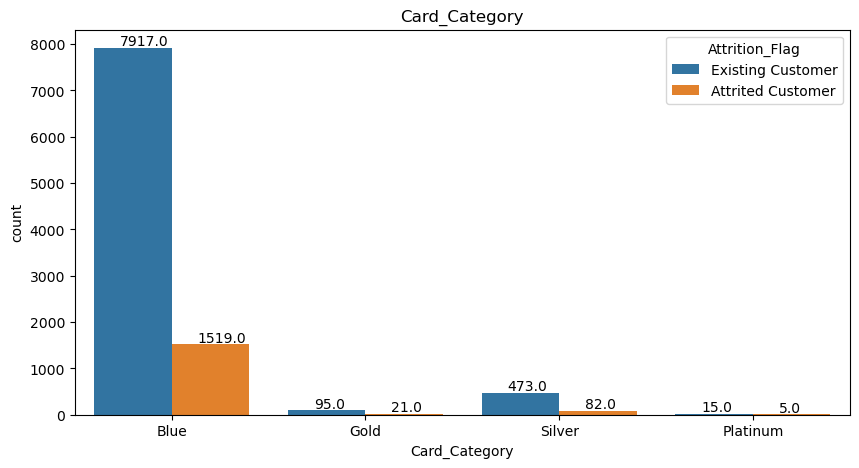

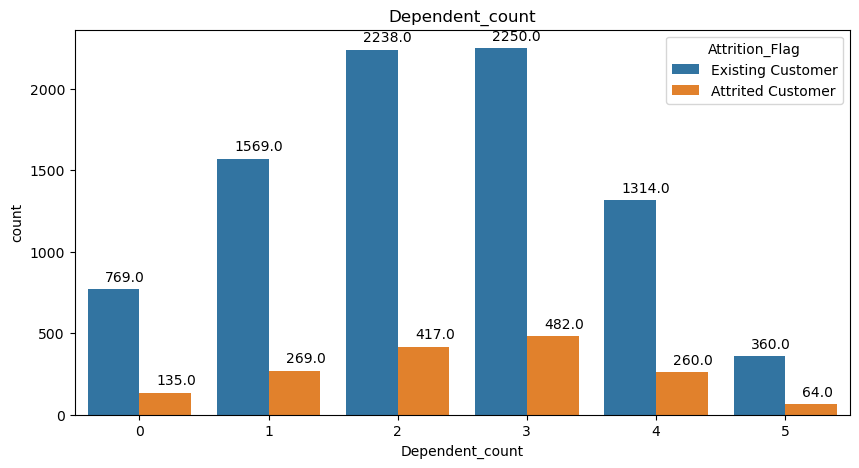

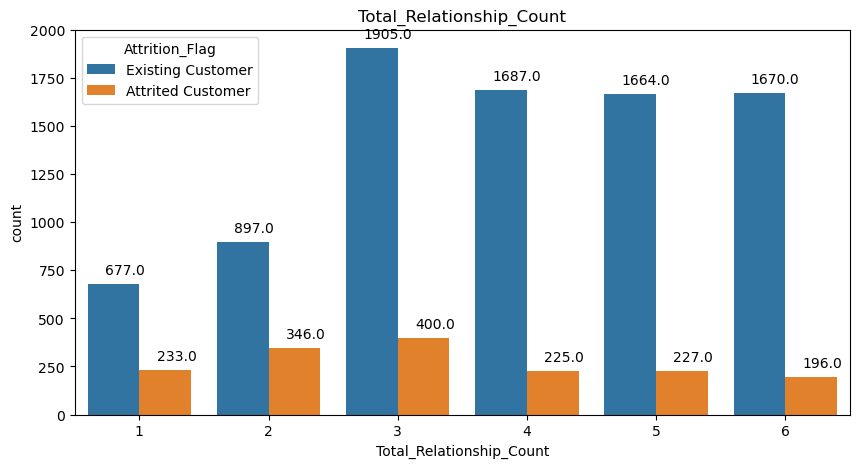

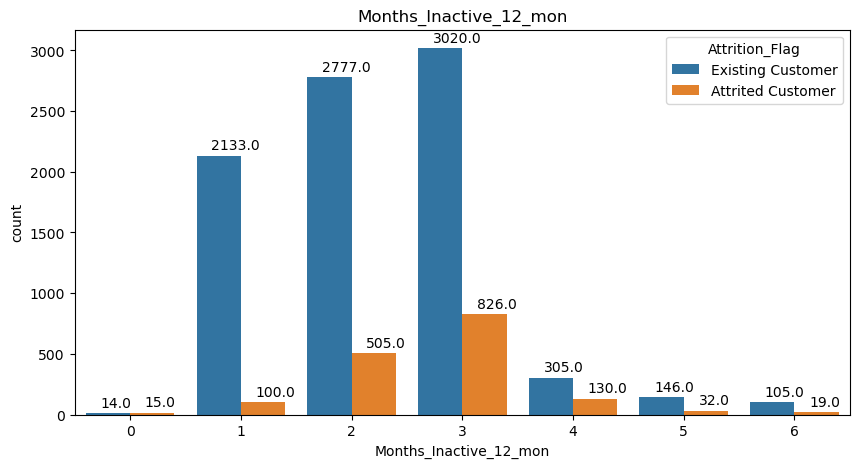

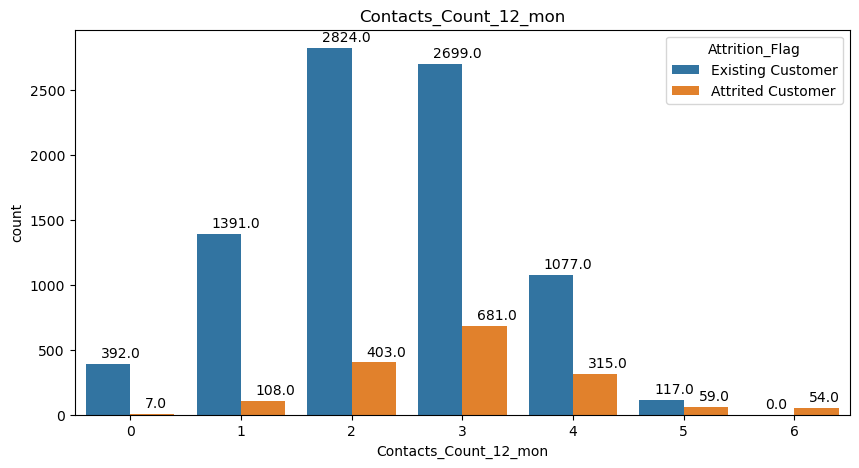

In [7]:
for colName in categorical_and_discrete:
    print('\n\n')
    plotColumn_vrs_target(df, colName,'Attrition_Flag')

Customer_Age


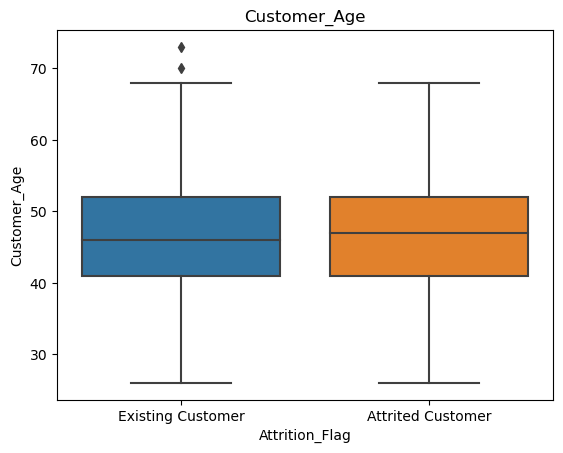

Months_on_book


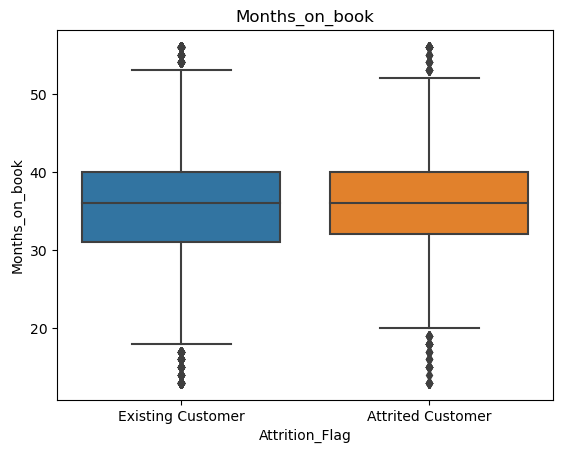

Credit_Limit


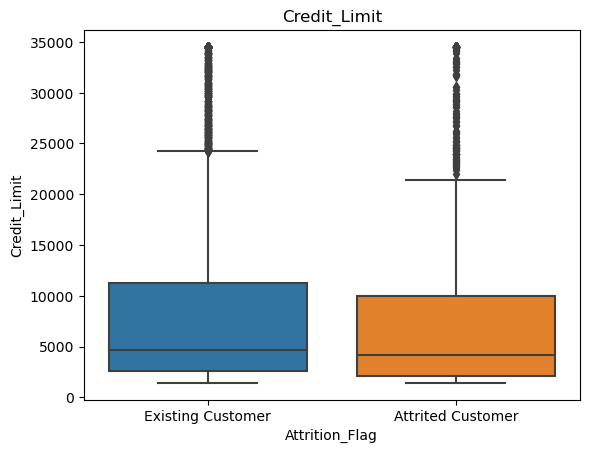

Total_Revolving_Bal


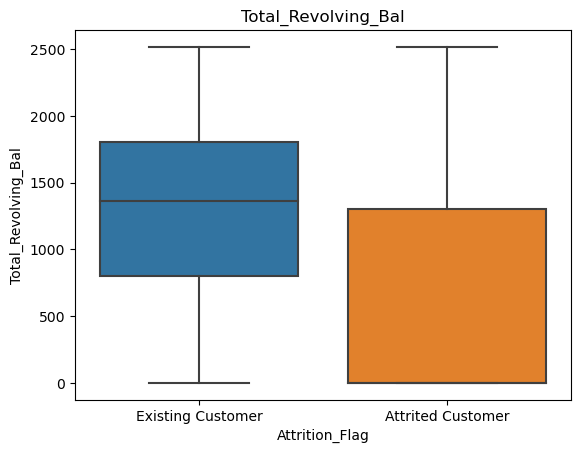

Avg_Open_To_Buy


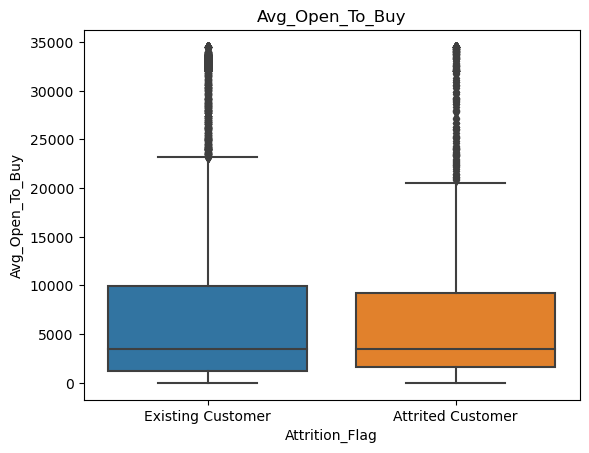

Total_Amt_Chng_Q4_Q1


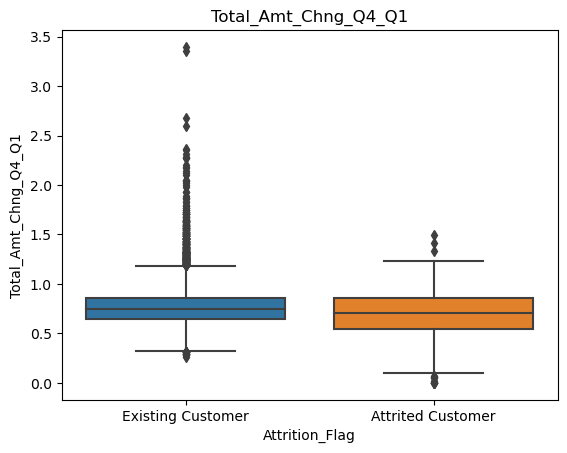

Total_Trans_Amt


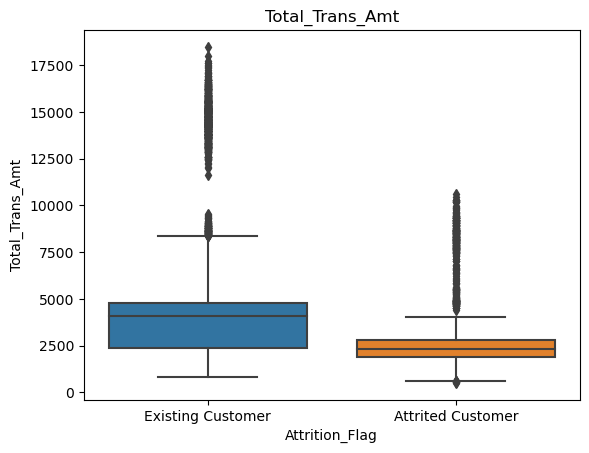

Total_Trans_Ct


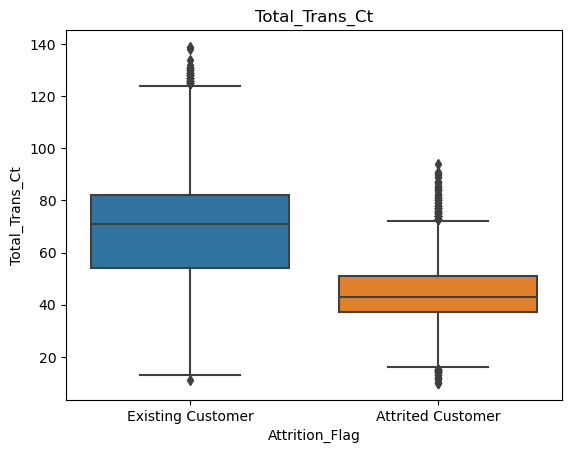

Total_Ct_Chng_Q4_Q1


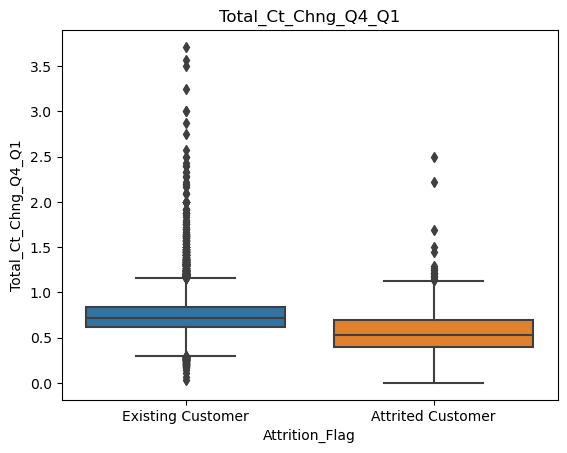

Avg_Utilization_Ratio


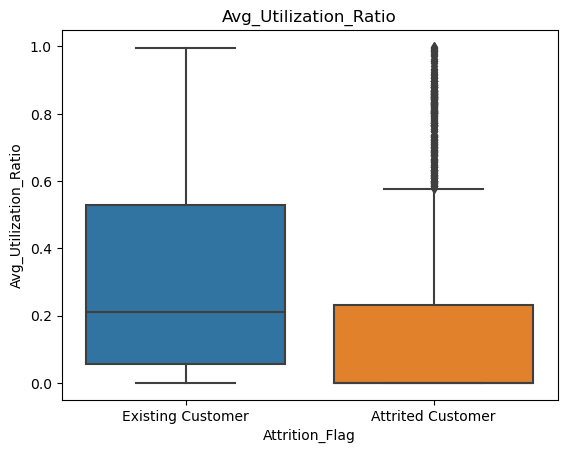

In [8]:
for colName in continuous:
    print(colName)
    sns.boxplot(x=df['Attrition_Flag'],y=df[colName])
    plt.title(colName)
    plt.show()

### Balanceo de Datos

In [9]:
df_attrited = df[df['Attrition_Flag'] == 'Attrited Customer']
df_existing = df[df['Attrition_Flag'] == 'Existing Customer']
cantidadExisting = 2*df_attrited.shape[0]
df_existing = df_existing.sample(n=cantidadExisting,random_state=2023)
df = pd.concat([df_attrited, df_existing])

### Ingenieria de Caracteristicas

#### Codificacion de Variables Categoricas

In [10]:
#Codificacion columna Gender
ohe_gender = pd.get_dummies(df['Gender'], drop_first=True)
df['Gender'] = ohe_gender

In [11]:
#Codificacion resto de variables categoricas
for colName in categorical:
    
    dict_for_encode = df[colName].value_counts().to_dict()
    df[colName]=df[colName].map(dict_for_encode)

In [12]:
df['Attrition_Flag'] = pd.get_dummies(df['Attrition_Flag'], drop_first=True)


### Construccion de Modelos

#### Preparacion

In [13]:
# Remover Attrition Flag y CLIENTNUM
X = df.drop(['Attrition_Flag','CLIENTNUM'], axis =1)
y = df['Attrition_Flag']

In [14]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=2023)

In [15]:
# Escalado de Variables
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#### Modelo SVM

In [16]:
svm_classifier = svm.SVC(kernel='linear', probability = True)
svm_classifier.fit(X_train_std, y_train)
svm_y_pred = svm_classifier.predict(X_test_std)

#### Modelo KNN

In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_std, y_train)
knn_y_pred = knn_classifier.predict(X_test_std)

#### Modelo Naive Bayes

In [19]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_std, y_train)
nb_y_pred = nb_classifier.predict(X_test_std)

#### Modelo LDA

In [26]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train_std, y_train)
lda_y_pred = lda_classifier.predict(X_test_std)

#### Modelo QDA

In [28]:
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train_std, y_train)
qda_y_pred = qda_classifier.predict(X_test_std)


C:\Users\52334879\AppData\Roaming\Python\Python310\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### Metricas

In [29]:
def print_model_scores(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")

print("SVM scores:")
print_model_scores(svm_classifier, X_test_std, y_test)

print("KNN scores:")
print_model_scores(knn_classifier, X_test_std, y_test)

print("NB scores:")
print_model_scores(nb_classifier, X_test_std, y_test)

print("LDA scores:")
print_model_scores(lda_classifier, X_test_std, y_test)

print("QDA scores:")
print_model_scores(qda_classifier, X_test_std, y_test)

SVM scores:
Accuracy: 0.8662, ROC AUC: 0.8407
KNN scores:
Accuracy: 0.8451, ROC AUC: 0.8095
NB scores:
Accuracy: 0.8082, ROC AUC: 0.7906
LDA scores:
Accuracy: 0.8655, ROC AUC: 0.8423
QDA scores:
Accuracy: 0.8703, ROC AUC: 0.8635
